## IMPORTING LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### LOADING DATA

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## GETTING TO KNOW OUR DATA

In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.columns, titanic.shape

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'), (891, 12))

In [5]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
titanic['Survived'].unique()

array([0, 1], dtype=int64)

In [7]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
# How many people died?
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
# What is the percentage of survivors?
survivors = len(titanic[titanic['Survived'] == 1])
print(survivors)
avg_survivors = survivors/len(titanic)
'Survivors in percentage:', round(avg_survivors, 2), "Deaths in percentage", round(1-avg_survivors,2)

342


('Survivors in percentage:', 0.38, 'Deaths in percentage', 0.62)

In [10]:
# Reduce dataset - select columns'Survived','Sex', 'Age'
selected = ['Survived','Sex', 'Age']
titanic_model = titanic[selected].copy()
titanic_model.head()

,Survived,Sex,Age
0,0,male,22.0
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
4,0,male,35.0


In [11]:
titanic_model.isnull().sum()

Survived      0
Sex           0
Age         177
dtype: int64

In [12]:
titanic_model['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
titanic_model['Age'].mean()

29.69911764705882

In [14]:
# Make sure that we don't have NULL (NaN) values in Age column. 
# Otherwise, we would have a problem with prediction variable later.
mean = titanic_model['Age'].mean()
titanic_model['Age'].fillna(mean, inplace=True)
titanic_model.isnull().sum()

Survived    0
Sex         0
Age         0
dtype: int64

In [15]:
women = sum(titanic_model['Sex'] == 'female')
men = sum(titanic_model['Sex'] == 'male')
women, men, women + men

(314, 577, 891)

In [16]:
wo_sur = len(titanic_model[(titanic_model['Survived'] == 1) & (titanic_model['Sex'] == 'female')])
avg_wo_sur = wo_sur/women
avg_wo_sur

0.7420382165605095

In [17]:
men_sur = len(titanic_model[(titanic_model['Survived'] == 1) & (titanic_model['Sex'] == 'male')])
avg_men_sur = men_sur/men
avg_men_sur

0.18890814558058924

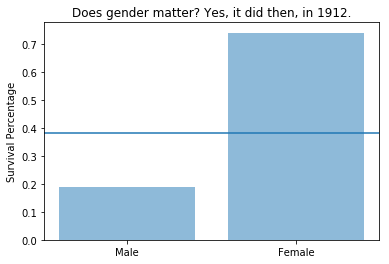

In [18]:
# Any connection with gender?
plt.title('Does gender matter? Yes, it did then, in 1912.')
objects = ('Male', 'Female')
x_pos = np.arange(len(objects))
performance = [avg_men_sur,avg_wo_sur]
 
plt.bar(x_pos, performance, align='center', alpha=0.5)
plt.xticks(x_pos, objects)
plt.ylabel('Survival Percentage')
plt.axhline(avg_survivors) 
plt.show()

# Classification

In [19]:
# We'll use Logistic Regression algorithm 
from sklearn.linear_model import LogisticRegression

In [20]:
baseline = round(max(avg_survivors, 1-avg_survivors), 2)
baseline

0.62

In [21]:
# Convert categorical variable into dummy/indicator variables
# male: yes(1) or no(0)
dummies = pd.get_dummies(titanic_model['Sex'], drop_first=True)
dummies.head()

,male
0,1
1,0
2,0
3,0
4,1


In [22]:
titanic_model['Gender_male'] = dummies['male']
#titanic_model.head()
print(titanic_model.columns)
titanic_model.drop('Sex', axis=1, inplace=True)
titanic_model.head()

Index(['Survived', 'Sex', 'Age', 'Gender_male'], dtype='object')


,Survived,Age,Gender_male
0,0,22.0,1
1,1,38.0,0
2,1,26.0,0
3,1,35.0,0
4,0,35.0,1


In [23]:
y = titanic_model['Survived']

X = titanic_model[['Age', 'Gender_male']]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [25]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
pred =log_reg.predict(X_test)
pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test, pred)

0.8071748878923767

In [28]:
# 1 is positive, 0 is negative
# Situation 1. We predicted 1 and it was 1. True Positive
# Situation 2. We predicted 0 and it was 0. True Negative.
# Situation 3. We predicted 1 and it was 0. False Positive.
# Situation 4. We predicted 0 and it was 1. False Negative.


In [29]:
from sklearn.metrics import confusion_matrix
# Negative is 0 and positive 1
#1 is what we want to predict (not a good thing)
confusion_matrix(y_test, pred)

array([[111,  18],
       [ 25,  69]], dtype=int64)

In [30]:
confusion_matrix(y_test, pred).ravel()

array([111,  18,  25,  69], dtype=int64)

In [31]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel() 
print("True Positive :", tp, '\n''True Negative:',tn, '\n'"False Positive: ", fp,'\n'"False Negative:", fn)

True Positive : 69 
True Negative: 111 
False Positive:  18 
False Negative: 25


In [32]:
# Calculate tp, tn, fp, fn ny hands, to compare with the sklearn.metrix, confusionm_matrix, method results
t_p = 0
t_n = 0
f_p = 0
f_n = 0
for a, b in zip(y_test, pred):
    if (a == 0) and (b == 0):
        t_n = t_n + 1
    elif (a==0) & (b==1):
        f_p += 1
    elif (a==1) and (b==1):
        t_p += 1
    else:
        f_n +=1
        
t_n, f_p, t_p, f_n

(111, 18, 69, 25)

In [33]:
pd.DataFrame(confusion_matrix(y_test, pred),\
             index = ['Actual Non-Survivor','Actual Survivor'],\
             columns = ['Predicted Non-Survivor','Predicted Survivor'])

,Predicted Non-Survivor,Predicted Survivor
Actual Non-Survivor,111,18
Actual Survivor,25,69


In [34]:
# Titanic passangers traveling with siblings or spouses from the dataset
len(titanic.loc[(titanic['SibSp'] == 1) & (titanic['Survived'] == 1)])/len(titanic[titanic['SibSp'] == 1])

0.5358851674641149

In [35]:
# Titanic passangers traveling without siblings or spouses from the dataset
#len(titanic.loc[(titanic['SibSp'] == 0) & (titanic['Survived'] == 1)])
titanic[titanic['SibSp'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S


In [36]:
survivors_per_sibsp = []
for i in sorted(titanic['SibSp'].unique()):
    survivors_per_sibsp.append(len(titanic.loc[(titanic['SibSp'] == i) & (titanic['Survived'] == 1)])/len(titanic[titanic['SibSp'] == i]))
survivors_per_sibsp

[0.34539473684210525,
 0.5358851674641149,
 0.4642857142857143,
 0.25,
 0.16666666666666666,
 0.0,
 0.0]

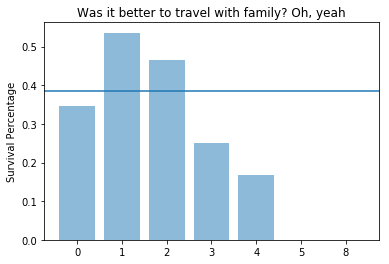

In [37]:
# Any connection with having family aboard ?
plt.title('Was it better to travel with family? Oh, yeah')
objects = list(sorted(titanic['SibSp'].unique()))
x_pos = np.arange(len(objects))
 
plt.bar(x_pos, survivors_per_sibsp, align='center', alpha=0.5)
plt.xticks(x_pos, objects)
plt.ylabel('Survival Percentage')
plt.axhline(avg_survivors) 
plt.show()

In [38]:
titanic_model['SibSp'] = titanic['SibSp']
titanic_model.head()

,Survived,Age,Gender_male,SibSp
0,0,22.0,1,1
1,1,38.0,0,1
2,1,26.0,0,0
3,1,35.0,0,1
4,0,35.0,1,0


In [39]:
y = titanic_model['Survived']

X = titanic_model[['Age', 'Gender_male', 'SibSp']]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [41]:
log_reg1 = LogisticRegression()
log_reg1.fit(X_train,y_train)
pred1 =log_reg1.predict(X_test)

In [42]:
accuracy_score(y_test, pred1)

0.8026905829596412

In [43]:
pd.DataFrame(confusion_matrix(y_test, pred1),\
             index = ['Actual Non-Survivor','Actual Survivor'],\
             columns = ['Predicted Non-Survivor','Predicted Survivor'])

,Predicted Non-Survivor,Predicted Survivor
Actual Non-Survivor,112,21
Actual Survivor,23,67


# Regression

In [44]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [45]:
for i in titanic.columns:
    print(i, titanic[i].isnull().sum())

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


In [46]:
titanic_rmodel = titanic[['Survived', 'Age', 'Sex', 'Pclass']]

In [47]:
rmean = titanic_rmodel['Age'].mean()

In [48]:
titanic_rmodel['Age'].fillna(rmean, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [49]:
dummies = pd.get_dummies(titanic_rmodel['Sex'], drop_first=True)
dummies.columns

Index(['male'], dtype='object')

In [50]:
titanic_rmodel['Gender_male'] = dummies['male']
#titanic_model.head()
print(titanic_rmodel.columns)
titanic_rmodel.drop('Sex', axis=1, inplace=True)
titanic_rmodel.head()

Index(['Survived', 'Age', 'Sex', 'Pclass', 'Gender_male'], dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Survived,Age,Pclass,Gender_male
0,0,22.0,3,1
1,1,38.0,1,0
2,1,26.0,3,0
3,1,35.0,1,0
4,0,35.0,3,1


In [51]:
y = titanic_rmodel['Age']

X = titanic_rmodel[['Survived', 'Pclass','Gender_male']]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [53]:
len(X_train)/(len(X_train) + len(X_test))

0.7497194163860831

In [54]:
baseline_list = [rmean]* 223
baseline_list[0:5]

[29.69911764705882,
 29.69911764705882,
 29.69911764705882,
 29.69911764705882,
 29.69911764705882]

In [55]:
# Using Linear Regression algorithm for the baseline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Baseline

In [56]:
mean_squared_error(y_test, baseline_list)

144.90077429244184

In [57]:
lr = LinearRegression()

lr.fit(X_train, y_train)
rpred = lr.predict(X_test)

In [58]:
mean_squared_error(y_test, rpred)

123.6710594362131

In [59]:
X_train.shape
#y_train.shape

(668, 3)

In [60]:
X_train.head()

,Survived,Pclass,Gender_male
516,1,2,0
501,0,3,0
708,1,1,0
614,0,3,1
353,0,3,1
